
<img src=https://static.casadomo.com/media/2020/02/lonmark-espana-universidad-valencia-jornada-automatizacion.png width="300">


# Aprendizaje máquina II: t-SNE

Yolanda Vives Gilabert

Este notebook demuestra el funcionamiento básico de la librerías openTSNE y sklearn.TSNE:

https://opentsne.readthedocs.io/en/latest/examples/01_simple_usage/01_simple_usage.html
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

Descargarse el fichero utils de https://github.com/pavlin-policar/openTSNE/blob/master/examples/utils.py

In [3]:
from openTSNE import TSNE
import utils
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Cargar datos

En este ejemplo se utiliza el dataset Macosko 2015, que son datos de retina de ratón. Se trata de un dataset bastante conocido y bastante explorado en la literatura. Se puede obtener en el siguiente enlace: http://file.biolab.si/opentsne/macosko_2015.pkl.gz

In [4]:
import gzip
import pickle

with gzip.open("data/macosko_2015.pkl.gz", "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"].astype(str)

print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


#### Crear train/test split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

30021 training samples
14787 test samples


#### Run t-SNE
Primero se creará un embedding de los datos. En el siguiente enlace encontrarás los parámetros de entrada de la función tsne.

https://opentsne.readthedocs.io/en/latest/api/index.html


In [6]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 2.70 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.23 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.06 seconds
===> Running optimization with exaggeration=12.00, lr=2501.75 for 250 iterations...
Iteration   50, KL divergence 5.8110, 50 iterations in 1.3565 sec
Iteration  100, KL divergence 5.2273, 50 iterations in 1.3712 sec
Iteration  150, KL divergence 5.1349, 50 iterations in 1.3668 sec
Iteration  200, KL divergence 5.0972, 50 iterations in 1.4048 sec
Iteration  250, KL divergence 5.0773, 50 iterations in 1.4192 sec
   --> Time elapsed: 6.92 seconds
===> Running optimization with exaggeration=1.00, lr=2501.75 for 500

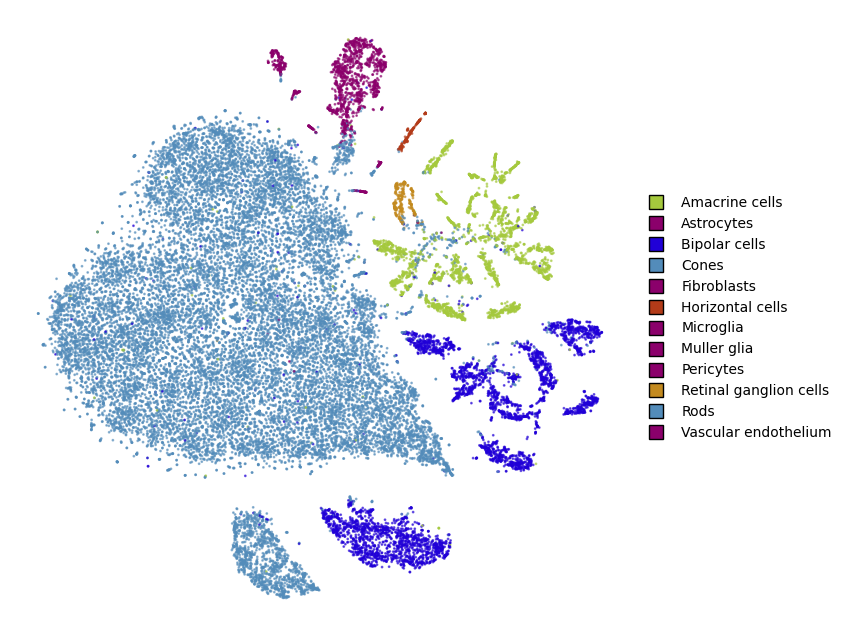

In [7]:
%time embedding_train = tsne.fit(x_train)

utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS)

#### Transformación

Actualmente openTSNE es la única librería que permite meter en el `embedding` nuevos puntos. 

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.73 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 214743.1403, 50 iterations in 0.2075 sec
Iteration  100, KL divergence 213274.9065, 50 iterations in 0.2138 sec
Iteration  150, KL divergence 212346.0855, 50 iterations in 0.2141 sec
Iteration  200, KL divergence 211690.4641, 50 iterations in 0.2196 sec
Iteration  250, KL divergence 211194.4663, 50 iterations in 0.2548 sec
   --> Time elapsed: 1.11 seconds
CPU times: total: 12.1 s
Wall time: 2.51 s


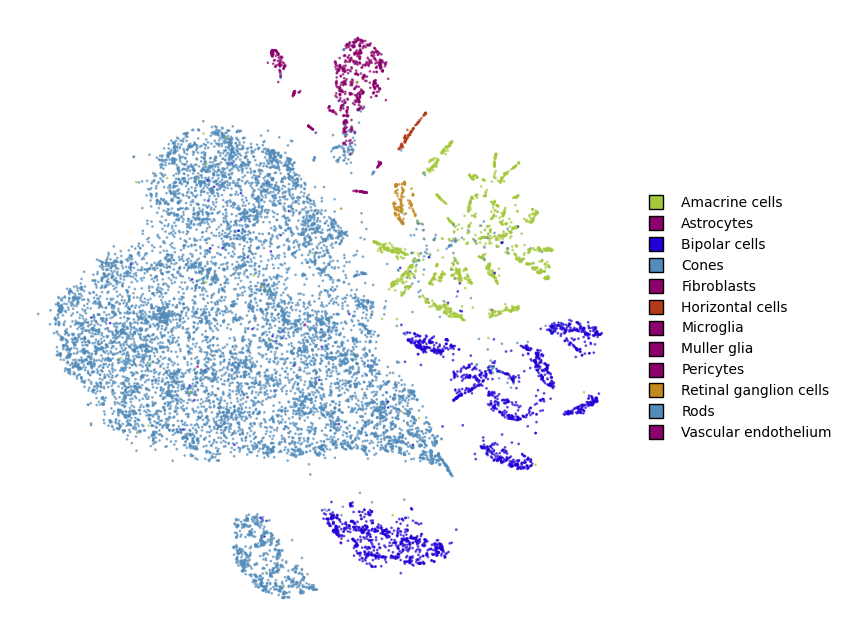

In [8]:
%time embedding_test = embedding_train.transform(x_test)

utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS)


#### Todo junto

Superpone los puntos transformados en el `embedding`original. 

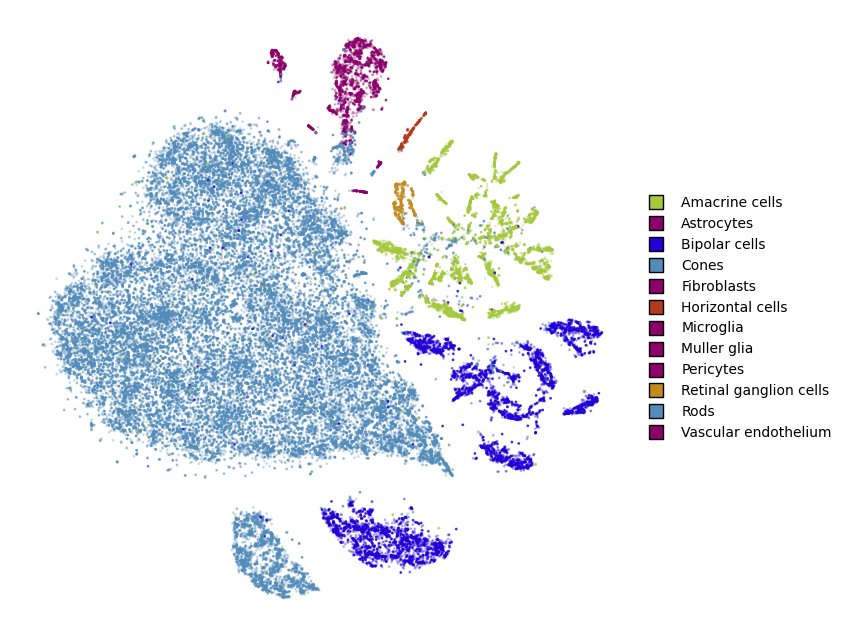

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS, alpha=0.25, ax=ax)
utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS, alpha=0.75, ax=ax)

## Ejercicios con OpenTSNE

Aplica el modelo t-SNE al dataset MNIST. 

#### Load data 
Load MNIST dataset: https://www.kaggle.com/weiouyang/test-dataset/version/1

(60000, 28, 28)
(60000,)


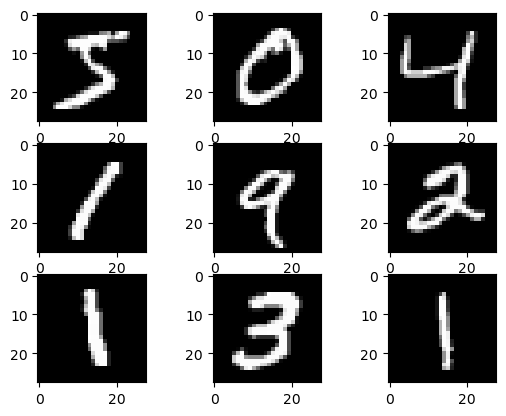

In [28]:
import gzip
import pickle
import sys
import matplotlib.pyplot as plt

f = gzip.open('data/mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    (X_train, y_train), (X_test, y_test) = pickle.load(f)
else:
    (X_train0, y_train), (X_test0, y_test) = pickle.load(f, encoding="bytes")
    
print(X_train0.shape)
print(y_train.shape)

for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train0[i], cmap=plt.get_cmap('gray'))

X_train0 = X_train0.reshape(60000,-1)



#### 1.- Empieza ejecutando la función con los valores por defecto (perplexity = 30, early_exaggeration = 12, initialization='pca')  para un subconjunto de train del 75% de la muestra.

(45000, 784)
(15000, 784)
(45000,)
(15000,)
--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...


KeyboardInterrupt: 

ValueError: x and y must be the same size

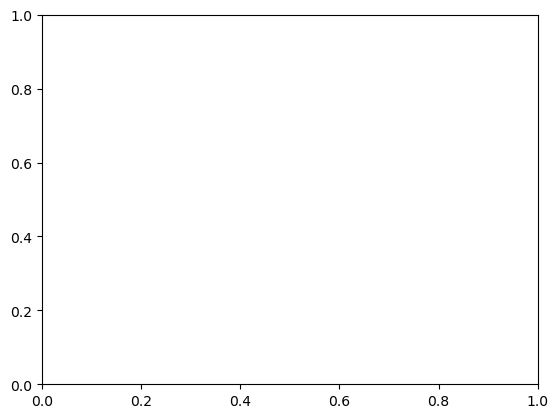

In [29]:



X_train, X_test, y_train, y_test = train_test_split(X_train0, y_train, test_size=0.25)

tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
    early_exaggeration=12,
    initialization="pca"
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

%time embedding_train = tsne.fit(X_train)

plt.scatter(embedding_train, y_train, colors=utils.MACOSKO_COLORS)

#### 2.- Ejecuta el modelo sin early_exaggeration (early_exaggeration=1). ¿Qué diferencias observas y a qué se deben?

#### 3.- Ejecuta el model con los valores por defecto pero cambiando la inicialización a `random`. ¿Qué ocurre? ¿Obtenemos mejores o peores resultados que en el caso anterior? Compara también los tiempos de ejecución y comenta porqué difieren.

#### 4.- Ejecuta el modelo con 2 valores muy dispares de perplexity, por ejemplo 1 y 100, (y el resto de valores por defecto) y comenta los resultados.

#### 5.- De todas las configuraciones de t-SNE probadas en los ejercicios anteriores, escoge la que mejores resultados obtiene y aplica los datos de test al embedding. Representa el dataset entero.

## Ejercicios con TSNE de sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.01)
plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

#### 1. Ejecuta t-sne de sklearn con el dataset de los círculos variando la perplexity (valores 5, 30, 100).

#### 2. ¿Que KL obtienes en cada caso?

#### 3. Compara los tiempos de ejecución de Barnes-Hut con el método exacto. Utiliza el valor de perplexity que mejor resultado haya obtenido según el ejercicio anterior.